In [1]:
import numpy as np
import os
import glob
import re
import pathlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import pandas as pd

In [2]:
acc = []
error = []
hyps = []
drops=[]
lrs = []
layers = []
out = glob.glob('./*/test_result.txt')

# loop for extracting the values of the accuracies for each hyperparameter set up, and extract the hyperparameters values 
for file in out[:]:
    #print(file)
    data = np.loadtxt(file)
    acc.append(data[0]) # for adding the file in the array 
    error.append(data[1])
    a = re.search(r'epo([0-9\.]+)_([0-9\.]+)bat_([0-9\.]+)feat_([0-9\.]+)lr_([0-9\.e\-]+)decay_([0-9\.]+)drop_([0-9\.]+)', file)
    lr = a.group(4)
    layer = a.group(7)
    drop = a.group(6)
    drops.append(drop) # for adding the file in the array 
    lrs.append(lr)
    layers.append(layer)
    #print(drop)

# print(drops)
hyps = [drops,lrs, layers]


#print(accu[0])


hyper = np.zeros(len(drops[:]))
for i in range(len(drops[:])):    
#     print(drops[i])
    hyper[i] = drops[i]
    
hyper = np.array(drops)
#print(hyper[0])


In [3]:
np_droprate = np.array(hyps[0],dtype=np.float)
np_lrate= np.array(hyps[1],dtype=np.float)
np_numlayers= np.array(hyps[2],dtype=np.float)
np_acc = np.array(acc,dtype=np.float)
np_error = np.array(error,dtype=np.float)

In [4]:
new_table = np.column_stack([np_droprate,np_numlayers,np_lrate,np_acc,np_error])

In [5]:
hyper_df = pd.DataFrame(new_table,columns=['Droprate','numlayers','lrate','acc','error']) # data frame creation

In [6]:
def extract_specific_combo(df,droprate,lr,num_layers):
    drop_df = df[np.isclose(df.Droprate,droprate)]
    lr_df = drop_df[np.isclose(drop_df.lrate,lr)]
    nlay_df = lr_df[np.isclose(lr_df.numlayers,num_layers)] # we filter each hyperparam accordingly to the previous one
    return nlay_df
    
    

In [7]:
x = extract_specific_combo(hyper_df,droprate=0.1,lr=10**-3.5,num_layers=2)

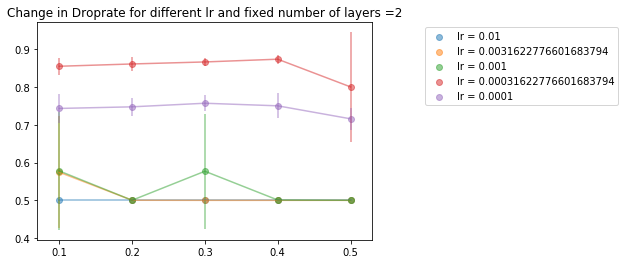

In [8]:
for lr in [10**-2,10**-2.5, 10**-3, 10**-3.5, 10**-4]: 
    drop_rate = []
    accuary = []
    error_list = []
    for drop in [0.1,0.2,0.3,0.4,0.5]:
        x = extract_specific_combo(hyper_df,droprate=drop,lr=lr,num_layers=2)
        drop_rate.append(x.Droprate.iloc[0])
        accuary.append(x.acc.iloc[0])
        error_list.append(x.error.iloc[0])
    plt.scatter(x= drop_rate,y= accuary,label='lr = {}'.format(lr),alpha=0.5)
    plt.errorbar(x=drop_rate,y= accuary,yerr=error_list,alpha=0.5)
plt.legend(bbox_to_anchor=(1.75, 1.0))
plt.title('Change in Droprate for different lr and fixed number of layers =2')
plt.show()
    

In [ ]:
for lr in [10**-2,10**-2.5, 10**-3, 10**-3.5, 10**-4]: 
    drop_rate = []
    accuary = []
    error_list = []
    for drop in [0.1,0.2,0.3,0.4,0.5]:
        x = extract_specific_combo(hyper_df,droprate=drop,lr=lr,num_layers=4)
        drop_rate.append(x.Droprate.iloc[0])
        accuary.append(x.acc.iloc[0])
        error_list.append(x.error.iloc[0])
    plt.scatter(x= drop_rate,y= accuary,label='lr = {}'.format(lr),alpha=0.5)
    plt.errorbar(x=drop_rate,y= accuary,yerr=error_list,alpha=0.5)
plt.legend(bbox_to_anchor=(1.75, 1.0))
plt.title('Change in Droprate for different lr and fixed number of layers =4')
plt.show()

In [ ]:
for lr in [10**-2,10**-2.5, 10**-3, 10**-3.5, 10**-4]: 
    numla = []
    accuary = []
    error_list = []
    for numlayer in [2,3,4]:
        x = extract_specific_combo(hyper_df,droprate=0.1,lr=lr,num_layers=numlayer)
        numla.append(x.numlayers.iloc[0])
        accuary.append(x.acc.iloc[0])
        error_list.append(x.error.iloc[0])
    plt.scatter(x= numla,y= accuary,label='lr = {}'.format(lr),alpha=0.5)
    plt.errorbar(x=numla,y= accuary,yerr=error_list,alpha=0.5)
plt.legend(bbox_to_anchor=(1.75, 1.0))
plt.title('Change in Number of layers for different lr and fixed number Droprate =0.1')
plt.show()
    

In [ ]:
# there is nothing really standing out here. 

In [ ]:
for lr in [10**-2,10**-2.5, 10**-3, 10**-3.5, 10**-4]: 
    numla = []
    accuary = []
    error_list = []
    for numlayer in [2,3,4]:
        x = extract_specific_combo(hyper_df,droprate=0.4,lr=lr,num_layers=numlayer)
        numla.append(x.numlayers.iloc[0])
        accuary.append(x.acc.iloc[0])
        error_list.append(x.error.iloc[0])
    plt.scatter(x= numla,y= accuary,label='lr = {:.6f}'.format(lr),alpha=0.5)
    plt.errorbar(x=numla,y= accuary,yerr=error_list,alpha=0.5)
plt.legend(bbox_to_anchor=(1.35, 1.0))
plt.title('Change in Number of layers for different lr and fixed number Droprate =0.4')
# plt.savefig('demo.png',bbox_inches='tight')
plt.show()
    

In [ ]:
# for lr = 0.001, the accuracy improves for a bigger number 
#of layers. But since there is a big error bar, we can't conclude it is a better model.

In [ ]:
drop_rate

In [ ]:
number_layers = []
accuary = []
for number in [2,3,4]:
    x = extract_specific_combo(hyper_df,num_layers=number,lr=0.0001,droprate=0.1)
    number_layers.append(x.numlayers.iloc[0])
    accuary.append(x.acc.iloc[0])
plt.plot(number_layers,accuary,'.')

In [ ]:
## 3d plot

In [ ]:
numla = []
accuary = []
error_list = []
drop_list = []
for drop in [0.1,0.2,0.3,0.4,0.5]:
    for lr in [10**-2,10**-2.5, 10**-3, 10**-3.5, 10**-4]: 
        for numlayer in [2,3,4]:
            x = extract_specific_combo(hyper_df,droprate=0.4,lr=lr,num_layers=numlayer)
            numla.append(x.numlayers.iloc[0])
            accuary.append(x.acc.iloc[0])
            error_list.append(x.error.iloc[0])
            error_list.append(x.error.iloc[0])
        plt.scatter(x= numla,y= accuary,label='lr = {:.6f}'.format(lr),alpha=0.5)
        plt.errorbar(x=numla,y= accuary,yerr=error_list,alpha=0.5)
    plt.legend(bbox_to_anchor=(1.35, 1.0))
    plt.title('Change in Number of layers for different lr and fixed number Droprate =0.4')
    # plt.savefig('demo.png',bbox_inches='tight')
    plt.show()

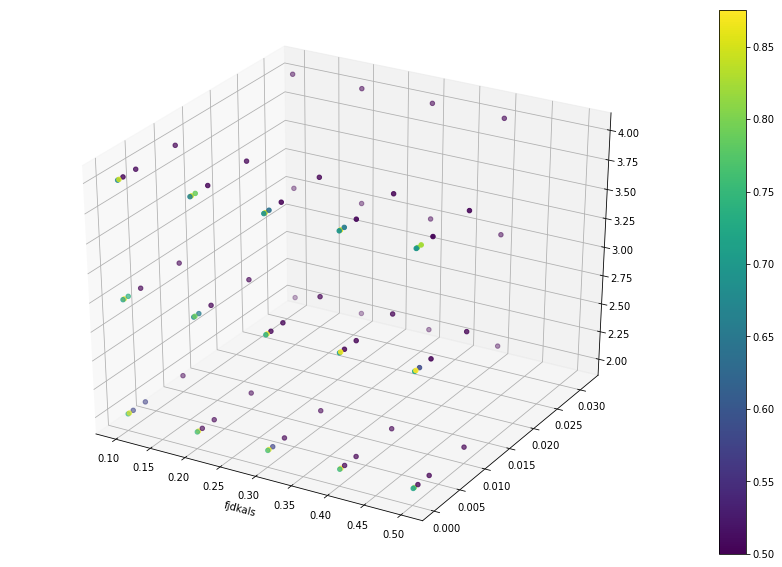

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection='3d')
ax.set_xlabel('fjdkals')
p = ax.scatter3D(hyper_df.Droprate, hyper_df.lrate, hyper_df.numlayers, c=hyper_df.acc)
fig.colorbar(p)